### scikit-learn中的多项式回归和Pipeline

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

### 引入预处理包的 PolynomialFeatures 来进行特征的构造

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree=2) #控制多项式的度
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [48]:
X[:5,:] # 分别是 X

array([[-1.44278808],
       [ 2.9227489 ],
       [-0.40047179],
       [ 0.85619   ],
       [ 2.67755523]])

In [49]:
X2[:5,:]  # 分别是 b , X , X^2

array([[ 1.        , -1.44278808,  2.08163745],
       [ 1.        ,  2.9227489 ,  8.54246113],
       [ 1.        , -0.40047179,  0.16037766],
       [ 1.        ,  0.85619   ,  0.73306132],
       [ 1.        ,  2.67755523,  7.16930202]])

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

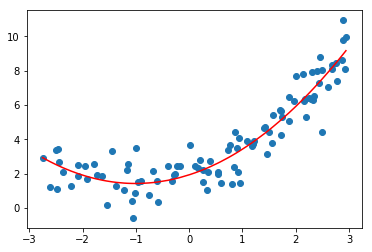

In [51]:
plt.scatter(x,y)
##要生成平滑的曲线，需要对x进行排序
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [52]:
lin_reg2.coef_ # 系数, 分别表示, X2样本特征第一列拟合的系数是0,以此类推

array([0.        , 0.99989439, 0.49574794])

In [53]:
lin_reg2.intercept_

1.9348085472828962

### 关于PolynomialFeatures
如果 X有两个特征,Poly后, 每列分别表示:  1(X1^0 * X2^0), X1, X2,  X1^2, X1X2, X2^2
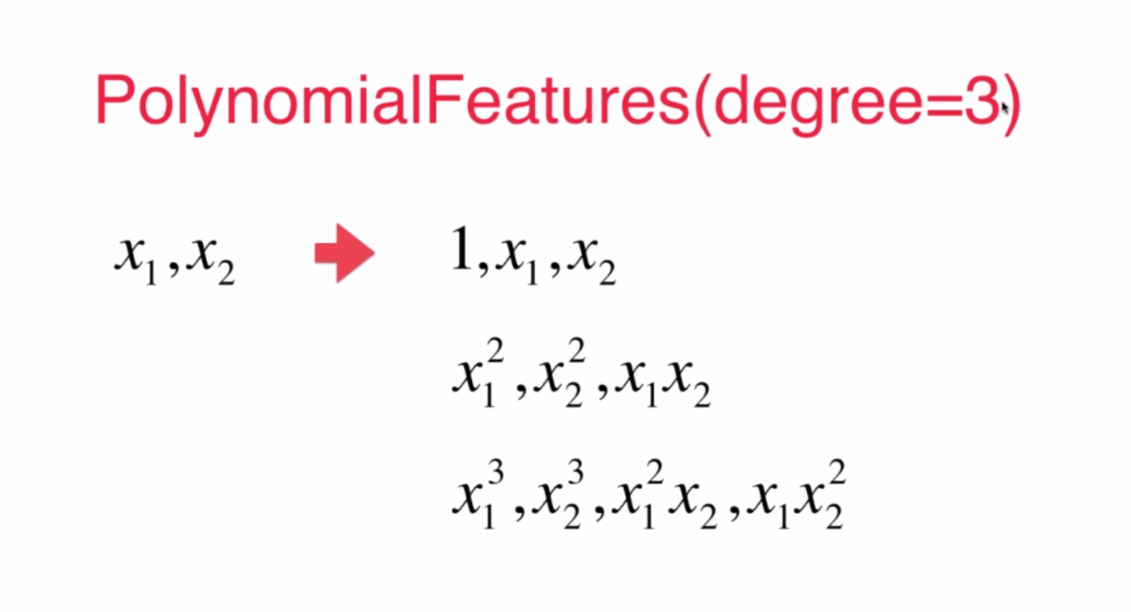

In [54]:
X = np.arange(1,11).reshape(-1,2)  # x有两个特征

In [55]:
X.shape # 5行2列的矩阵

(5, 2)

In [56]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [57]:
# 使用poly
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [58]:
X2.shape  # 列数变多了, 由 2 => 6

(5, 6)

In [59]:
X2  # 每列分别表示:  1, X1, X2,  X1^2, X1X2, X2^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline, 串连 Poly, std_scaler, linearReg

In [60]:
# 创建数据
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5*(x**2) + x + 2 + np.random.normal(0,1,100)



In [61]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly",PolynomialFeatures()),
    ("std_scaler",StandardScaler()), # 作用：去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本。
    ("lin_reg",LinearRegression())
    
])

In [62]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

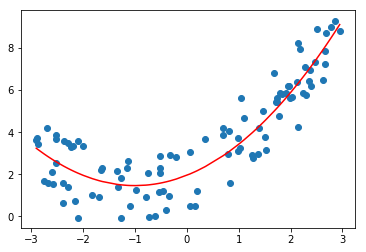

In [63]:
plt.scatter(x,y)
##要生成平滑的曲线，需要对x进行排序
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()